In [1]:
import pandas as pd 

from sklearn.linear_model import (
    RANSACRegressor, HuberRegressor
)
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
if __name__ == "__main__":
    dataset = pd.read_csv("./data/nyc-rolling-sales.csv")

    dataset = dataset.replace(" -  ", 0)
    dataset = dataset.fillna(0)

    X= dataset.drop(['Unnamed: 0','TAX CLASS AT PRESENT','NEIGHBORHOOD','BUILDING CLASS CATEGORY','EASE-MENT','BUILDING CLASS AT PRESENT','ADDRESS','APARTMENT NUMBER','BUILDING CLASS AT TIME OF SALE','SALE PRICE','SALE DATE'], axis=1)
    Y = dataset[['SALE PRICE']]

    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

    estimadores = {
        'SVR' : SVR(gamma= 'auto', C=1.0, epsilon=0.1),
        'RANSAC' : RANSACRegressor(),
        'HUBER' : HuberRegressor(epsilon=1.35)
    }

    for name, estimador in estimadores.items():
        estimador.fit(X_train,y_train)
        predictions = estimador.predict(X_test)  # Usar 'predict' en lugar de 'prediction'

        print("="*32)
        print(name)
        print('MSE: ', mean_squared_error(y_test, predictions))

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be

SVR
MSE:  79526525859607.89
RANSAC
MSE:  412226720808828.6
HUBER
MSE:  71877525823498.38


/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed

ValueError: `dataset` input should have multiple elements.

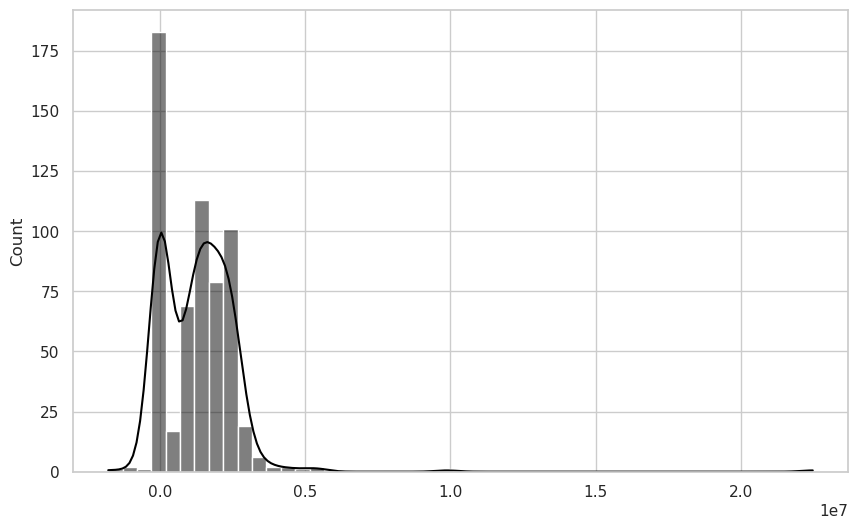

In [3]:
# Asumiendo que 'predictions' es un array con tus predicciones y 'y_test' son los valores reales
predictions = np.array(predictions)
y_test = np.array(y_test)

# Configura el estilo y los colores de los gráficos
sns.set(style="whitegrid")
colors = ["black", "yellow"]

# Histograma
plt.figure(figsize=(10,6))
sns.histplot(predictions, color=colors[0], kde=True, label='Predicciones')
sns.histplot(y_test, color=colors[1], kde=True, label='Valores reales')
plt.title('Histograma de Predicciones vs Valores Reales')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be

SVR
MSE:  79526525859607.89


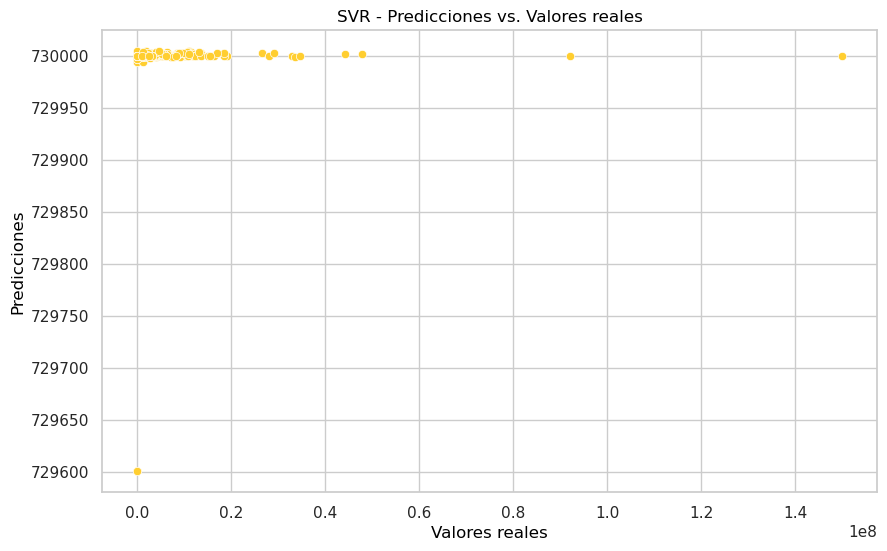

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be

RANSAC
MSE:  2.841418865504195e+18


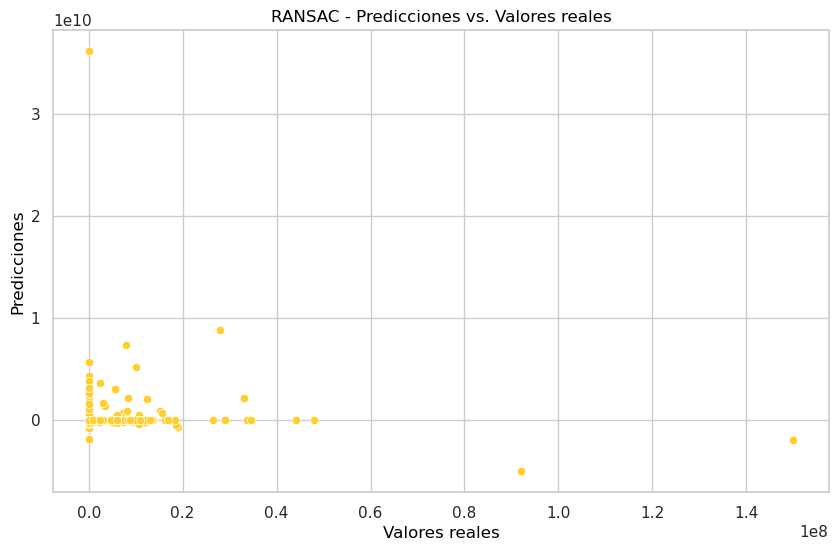

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be

HUBER
MSE:  71877525823498.38


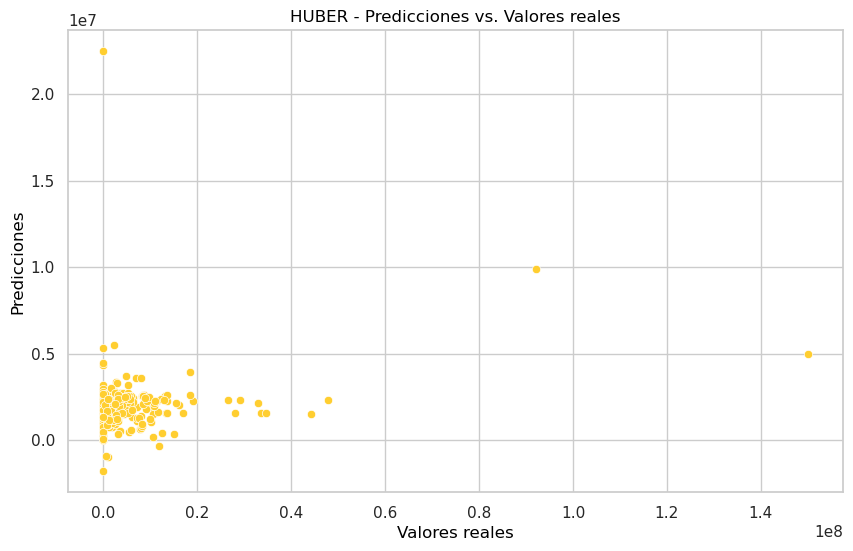

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_results(y_test, predictions, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test.flatten(), y=predictions.flatten(), color="#FFCE30")
    plt.title(f'{model_name} - Predicciones vs. Valores reales', color="black")
    plt.xlabel('Valores reales', color="black")
    plt.ylabel('Predicciones', color="black")
    plt.show()

if __name__ == "__main__":
    # ... Tu código anterior ...

    for name, estimador in estimadores.items():
        estimador.fit(X_train, y_train)
        predictions = estimador.predict(X_test)

        print("=" * 32)
        print(name)
        print('MSE: ', mean_squared_error(y_test, predictions))

        # Agrega la llamada a la función de visualización
        plot_results(y_test, predictions, name)
